In [1]:
# Import Numpy for calculations and matplotlib for charting
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
from scipy import stats

In [2]:
# Read our data file the pandas library
file_path = Path("../Resources/Michigan_predictions_results.csv")
data = pd.read_csv(file_path)

file_path2 = Path("../Resources/proj_4_feat_target_var_set_update.csv")
data2 = pd.read_csv(file_path2)

# Display sample data

data2

,fips_code,state_id,state_name,year,niaaa_pop_21_plus,census_total_pop,census_percent_pop_21_plus,census_percent_pop_18_24,census_percent_pop_25_34,census_percent_pop_35_44,...,tpc_state_beer_tax_rates_dollar_gal,bea_personal_income_dollars,bea_disp_inc_dollars,bea_percapita_personal_income_dollars,bea_percapita_disp_inc_dollars,census_median_household_inc_dollars,niaaa_total_beer_vol_consumed_gallons,niaaa_legal_adult_per_capita_beer_consumed_gallons,ba_craft_beer_produced_gallons,ba_legal_adult_per_capita_craft_beer_produced_gallons
0,1,AL,Alabama,2010,3439923,4785298,0.716,0.102,0.126,0.130,...,1.05,162068.8,148862.1,33849,31091,40474,101835000,29.60,NaN,NaN
1,2,AK,Alaska,2010,494781,713985,0.692,0.105,0.145,0.131,...,1.07,35374.3,32703.9,49543,45803,64576,15476350,31.28,NaN,NaN
2,4,AZ,Arizona,2010,4496526,6413737,0.702,0.099,0.134,0.128,...,0.16,216223.6,198815.2,33774,31055,46789,140015325,31.14,NaN,NaN
3,5,AR,Arkansas,2010,2082760,2921606,0.710,0.100,0.126,0.127,...,0.24,94127.0,86387.0,32218,29569,38307,53429000,25.65,NaN,NaN
4,6,CA,California,2010,26311028,37349363,0.704,0.106,0.143,0.139,...,0.20,1609997.5,1431825.6,43138,38364,57708,651673303,24.77,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,51,VA,Virginia,2021,6412892,8642274,0.740,0.095,0.134,0.136,...,0.26,578639.7,499639.6,66838,57713,80963,151097751,23.56,14074350.0,2.19
608,53,WA,Washington,2021,5795889,7738692,0.748,0.086,0.151,0.142,...,0.26,574266.8,505590.1,74188,65315,84247,125364000,21.63,17599728.0,3.04
609,54,WV,West Virginia,2021,1358876,1782959,0.758,0.088,0.113,0.125,...,0.18,87617.4,79840.2,49071,44715,51248,38037000,27.99,733894.0,0.54
610,55,WI,Wisconsin,2021,4383656,5895908,0.743,0.092,0.125,0.127,...,0.06,355048.0,314662.1,60381,53513,67125,135005000,30.80,30531485.0,6.96


In [3]:
fips = 26
condition = data2['fips_code'] == fips
data2 = data2[condition]
data2

,fips_code,state_id,state_name,year,niaaa_pop_21_plus,census_total_pop,census_percent_pop_21_plus,census_percent_pop_18_24,census_percent_pop_25_34,census_percent_pop_35_44,...,tpc_state_beer_tax_rates_dollar_gal,bea_personal_income_dollars,bea_disp_inc_dollars,bea_percapita_personal_income_dollars,bea_percapita_disp_inc_dollars,census_median_household_inc_dollars,niaaa_total_beer_vol_consumed_gallons,niaaa_legal_adult_per_capita_beer_consumed_gallons,ba_craft_beer_produced_gallons,ba_legal_adult_per_capita_craft_beer_produced_gallons
22,26,MI,Michigan,2010,7089538,9877574,0.716,0.0980,0.1180,0.1290,...,0.2,352074.3,321080.3,35635,32498,45413,196593940,27.73,NaN,NaN
73,26,MI,Michigan,2011,7132733,9876187,0.721,0.1010,0.1180,0.1260,...,0.2,372954.2,336072.2,37689,33962,45981,194106015,27.21,11060180.0,1.55
124,26,MI,Michigan,2012,7187502,9883360,0.725,0.1010,0.1190,0.1240,...,0.2,387339.2,348254.6,39043,35104,46859,195288672,27.17,13589873.0,1.89
175,26,MI,Michigan,2013,7236934,9895622,0.729,0.1020,0.1190,0.1220,...,0.2,390857.9,347736.1,39293,34958,48273,184789824,25.53,18070167.0,2.50
226,26,MI,Michigan,2014,7282231,9909877,0.733,0.1010,0.1210,0.1200,...,0.2,407267.0,362554.6,40830,36348,49847,192738252,26.47,25578181.0,3.51
277,26,MI,Michigan,2015,7312497,9922576,0.735,0.0990,0.1230,0.1180,...,0.2,429284.9,380285.6,42984,38078,51084,180825871,24.73,23866807.0,3.26
328,26,MI,Michigan,2016,7351721,9928300,0.737,0.0980,0.1260,0.1170,...,0.2,441557.2,389478.1,44081,38882,52492,190290886,25.88,26226897.0,3.57
379,26,MI,Michigan,2017,7391332,9962311,0.740,0.0970,0.1270,0.1160,...,0.2,454894.8,402996.6,45264,40100,54909,186716677,25.26,27093830.0,3.67
430,26,MI,Michigan,2018,7422235,9995915,0.741,0.0960,0.1290,0.1170,...,0.2,474208.0,422585.8,47088,41962,56697,186165445,25.08,26970839.0,3.63
481,26,MI,Michigan,2019,7443390,9986857,0.744,0.0950,0.1300,0.1180,...,0.2,489493.1,436361.6,48569,43297,59584,184718721,24.82,28133545.0,3.78


In [4]:
sample_data = data['Predicted_Value']

# Calculate sample statistics
sample_mean = sample_data.mean()
sample_std = sample_data.std()
sample_size = len(sample_data)

# Choose confidence level
confidence_level = 0.95

# Calculate critical value
critical_value = stats.t.ppf((1 + confidence_level) / 2, df=sample_size - 1)

# Calulate standard error
standard_error = sample_std / (sample_size ** 0.5)

# Calculate margin of error
margin_of_error = critical_value * standard_error

# Calculate lower and upper bounds
lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

# Add lower and upper bounds to a new column in the DataFrame

data['Lower Bound'] = lower_bound
data['Upper Bound'] = upper_bound

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
data.head()

Lower Bound: 28.117600589458917
Upper Bound: 29.263626941031532


,Percentage,Predicted_Value,Lower Bound,Upper Bound
0,0.01,22.361579,28.117601,29.263627
1,0.02,22.361579,28.117601,29.263627
2,0.03,22.361579,28.117601,29.263627
3,0.04,22.361579,28.117601,29.263627
4,0.05,22.545458,28.117601,29.263627


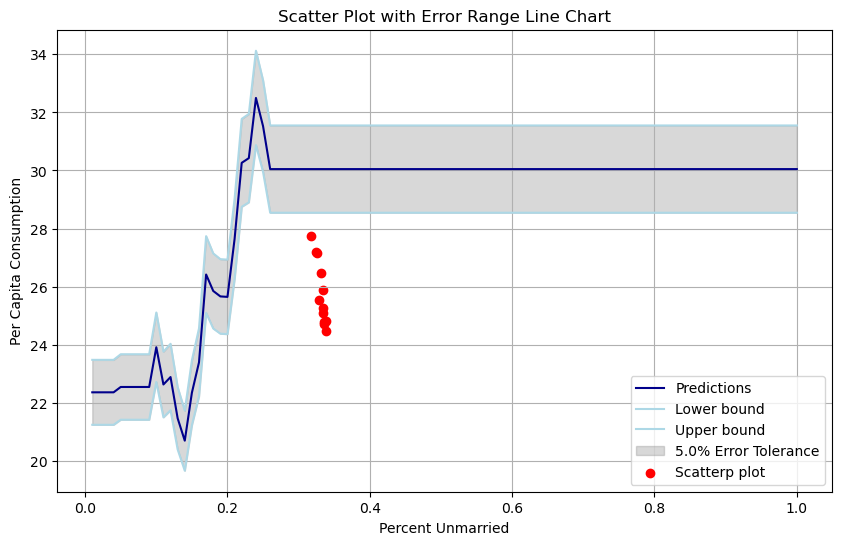

In [5]:
# Extract columns for X-axis, Y-axis, and error range bounds
x_values = data['Percentage']  # Replace 'X-axis' with the actual column name for X-axis data
y_values = data['Predicted_Value']  # Replace 'Y-axis' with the actual column name for Y-axis data

tolerance = 0.05
lowerY = data['Predicted_Value'] * (1 - tolerance)
upperY = data['Predicted_Value'] * (1 + tolerance)

# Plot the error range with the line graph
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='Predictions', color = 'darkblue')
plt.plot(x_values, lowerY, label='Lower bound', color = 'lightblue')
plt.plot(x_values, upperY, label='Upper bound', color = 'lightblue')
plt.fill_between(x_values, lowerY, upperY, color='gray', alpha=0.3, label=f'{tolerance*100}% Error Tolerance')

scatterX = data2['census_percent_pop_never_married']
scatterY = data2['niaaa_legal_adult_per_capita_beer_consumed_gallons']

plt.scatter(scatterX, scatterY, label='Scatterp plot', color='red')

# Customize labels and title
plt.xlabel('Percent Never Married')
plt.ylabel('Per Capita Consumption')
plt.title('Scatter Plot with Error Range Line Chart for Michigan')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()